In [66]:
# Install xgboost in notebook instance 
!conda install -y -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.6.14

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [77]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [78]:
# Read the taining and validation files 
df_train = pd.read_csv('bikesharing_train.csv')
df_valida = pd.read_csv('bikesharing_valida.csv')

In [79]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-09-03 00:00:00,3,0,0,2,26.24,30.305,73,7.0015,22,65,87,2011,9,3,5,0
1,2012-08-13 14:00:00,3,0,1,1,32.80,34.850,33,7.0015,85,163,248,2012,8,13,0,14
2,2011-11-05 17:00:00,4,0,0,1,15.58,19.695,40,11.0014,100,234,334,2011,11,5,5,17
3,2012-08-09 19:00:00,3,0,1,1,32.80,37.880,55,12.9980,90,533,623,2012,8,9,3,19
4,2011-04-14 06:00:00,2,0,1,1,13.94,17.425,76,7.0015,4,66,70,2011,4,14,3,6


In [80]:
df_valida.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-09-03 00:00:00,3,0,0,2,26.24,30.305,73,7.0015,22,65,87,2011,9,3,5,0
1,2012-08-13 14:00:00,3,0,1,1,32.80,34.850,33,7.0015,85,163,248,2012,8,13,0,14
2,2011-11-05 17:00:00,4,0,0,1,15.58,19.695,40,11.0014,100,234,334,2011,11,5,5,17
3,2012-08-09 19:00:00,3,0,1,1,32.80,37.880,55,12.9980,90,533,623,2012,8,9,3,19
4,2011-04-14 06:00:00,2,0,1,1,13.94,17.425,76,7.0015,4,66,70,2011,4,14,3,6


In [81]:
# Now lets eparate the independent and depedent variables
columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
          'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek', 'hour']
x_train = df_train[columns] # Input features
y_train = df_train['count'].ravel() # Traget column 

In [82]:
x_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [83]:
# Similarly for validation dataset
x_valida = df_valida[columns]
y_valida = df_valida['count'].ravel()

In [84]:
#XGBoost Training parameter reference:
regressor = xgb.XGBRegressor(max_depth=5, eta=0.1, subsample=0.7, num_rounds=150)

In [85]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_rounds=150, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)

In [86]:
regressor.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valida, y_valida)])

[0]	validation_0-rmse:242.007	validation_1-rmse:237.789
[1]	validation_0-rmse:222.787	validation_1-rmse:218.811
[2]	validation_0-rmse:205.625	validation_1-rmse:202.139
[3]	validation_0-rmse:190.616	validation_1-rmse:187.472
[4]	validation_0-rmse:177.129	validation_1-rmse:174.272
[5]	validation_0-rmse:165.412	validation_1-rmse:163
[6]	validation_0-rmse:155.155	validation_1-rmse:152.994
[7]	validation_0-rmse:146.127	validation_1-rmse:144.246
[8]	validation_0-rmse:137.882	validation_1-rmse:136.201
[9]	validation_0-rmse:129.922	validation_1-rmse:128.439
[10]	validation_0-rmse:123.095	validation_1-rmse:121.905
[11]	validation_0-rmse:116.566	validation_1-rmse:115.482
[12]	validation_0-rmse:111.124	validation_1-rmse:110.28
[13]	validation_0-rmse:104.706	validation_1-rmse:103.961
[14]	validation_0-rmse:100.904	validation_1-rmse:100.237
[15]	validation_0-rmse:96.8295	validation_1-rmse:96.2201
[16]	validation_0-rmse:93.7757	validation_1-rmse:93.2147
[17]	validation_0-rmse:89.5102	validation_1-rm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_rounds=150, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)

In [87]:
eval_results = regressor.evals_result()

In [88]:
training_rounds = range(len(eval_results['validation_0']['rmse']))

In [89]:
training_rounds

range(0, 100)

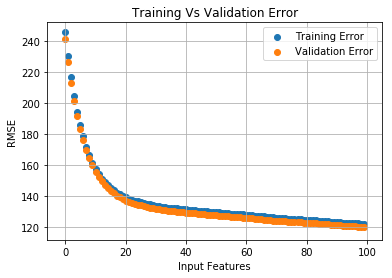

In [90]:
# Plot the eavluation results to understand the error margin for training and validation datasets

plt.scatter(x=training_rounds, y=eval_reults['validation_0']['rmse'], label='Training Error')
plt.scatter(x=training_rounds, y=eval_reults['validation_1']['rmse'], label='Validation Error')
plt.grid(True)
plt.xlabel('Input Features')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

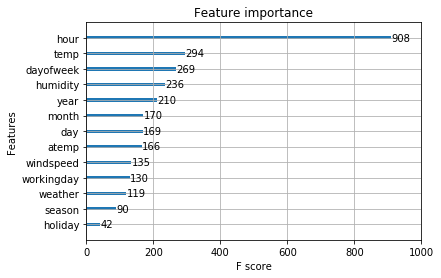

In [91]:
xgb.plot_importance(regressor)

In [92]:
# Read the complete dataset and predict the count for the entire dataset.
df = pd.read_csv('bikesharing_all_data.csv')

In [93]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [94]:
X_test = df[columns]

In [95]:
results = regressor.predict(X_test)

In [96]:
results[:5]

array([32.89392  , 35.87318  , 26.616594 ,  7.4038415, -3.2827568],
      dtype=float32)

In [97]:
df['count_pred'] = results

In [98]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour,count_pred
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0,32.893921
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1,35.873180
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2,26.616594
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3,7.403841
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4,-3.282757


In [99]:
df['count_pred'].describe()

count    10886.000000
mean       191.312378
std        171.435974
min        -69.783882
25%         41.953001
50%        152.628525
75%        286.643951
max        868.469849
Name: count_pred, dtype: float64

In [100]:
# From the description we know that there are some negative values which in this context do not signify anything.
df[df['count_pred'] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour,count_pred
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,5,4,-3.282757
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,5,-1.155696
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,5,6,-0.996184
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,5,7,-34.508530
18,2011-01-01 18:00:00,1,0,0,3,17.22,21.210,88,16.9979,9,26,35,2011,1,1,5,18,-3.423020
19,2011-01-01 19:00:00,1,0,0,3,17.22,21.210,88,16.9979,6,31,37,2011,1,1,5,19,-2.785019
28,2011-01-02 04:00:00,1,0,0,2,18.86,22.725,94,12.9980,2,1,3,2011,1,2,6,4,-7.411734
29,2011-01-02 06:00:00,1,0,0,3,17.22,21.210,77,19.9995,0,2,2,2011,1,2,6,6,-7.941852
30,2011-01-02 07:00:00,1,0,0,2,16.40,20.455,76,12.9980,0,1,1,2011,1,2,6,7,-18.278965
44,2011-01-02 21:00:00,1,0,0,1,10.66,11.365,44,22.0028,11,20,31,2011,1,2,6,21,-2.654325


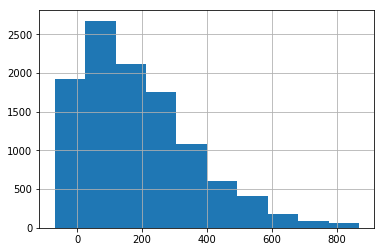

In [101]:
df['count_pred'].hist()

In [102]:
# The negative values need to be replaced by zero. 
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [103]:
df['count_pred'] = df['count_pred'].map(adjust_count)

In [104]:
df[df['count_pred'] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour,count_pred


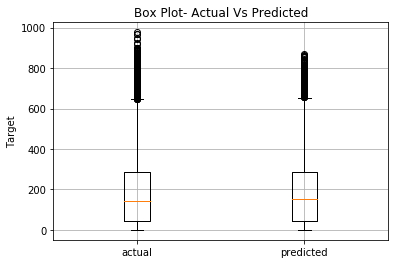

In [105]:
# Create a box plot of Actual vs Predicted values to understand the outliers

plt.boxplot([df['count'], df['count_pred']], labels=['actual', 'predicted'])
plt.title('Box Plot- Actual Vs Predicted')
plt.ylabel('Target')
plt.grid(True)
# The graph indicates there are a lot of outliers. 

In [106]:
# lets check if the model is over predicting or under predicting
# Training data residuals

residual = (df['count_pred'] - df['count'])

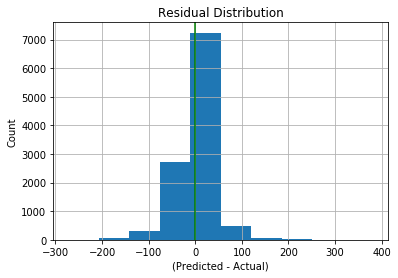

In [107]:
plt.hist(residual)
plt.grid(True)
plt.xlabel('(Predicted - Actual)')
plt.ylabel('Count')
plt.title('Residual Distribution')
plt.axvline(color='g')

# Over Prediction and Under Prediction needs to be balanced and in this case it does look balanced. 

In [108]:
# Lets comput the metric and submit it to kaggle 
import sklearn.metrics as metrics
print("RMSE: {0}". format(metrics.mean_squared_error(df['count'], df['count_pred'])**.5))

RMSE: 38.4592770007648


In [109]:
# Metric used by Kaggle RMSLE
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
    
    return (np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [110]:
print("RMSLE: {0}". format(compute_rmsle(df['count'], df['count_pred'])))

RMSLE: 0.4702600891438421


In [111]:
# Prepare data for submission to Kaggle 

df_test = pd.read_csv('test_data.csv', parse_dates=['datetime'])

In [112]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [113]:
# Lets predict the count for the test data
# to dothis we need to remove the datetime column from the test data set. 

x_test = df_test.iloc[:, 1:] # Exclude datetime for prediction 

In [114]:
x_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [115]:
test_results = regressor.predict(x_test)

In [116]:
test_results[:5]

array([11.362558 , -0.7155521, -4.781685 , -4.620646 , -4.620646 ],
      dtype=float32)

In [117]:
df_test['count'] = test_results

In [118]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,11.362558
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,-0.715552
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,-4.781685
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,-4.620646
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,-4.620646


In [119]:
# Check for negative values and replace the negative values with 0
df_test[df_test['count'] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,-0.715552
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,-4.781685
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,-4.620646
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,-4.620646
25,2011-01-21 01:00:00,1,0,1,2,9.84,11.365,70,16.9979,2011,1,21,4,1,-1.822728
26,2011-01-21 02:00:00,1,0,1,3,9.84,12.120,75,11.0014,2011,1,21,4,2,-7.616199
27,2011-01-21 03:00:00,1,0,1,3,9.02,10.605,80,19.9995,2011,1,21,4,3,-7.002567
28,2011-01-21 04:00:00,1,0,1,2,9.02,12.880,87,6.0032,2011,1,21,4,4,-6.048783
52,2011-01-22 04:00:00,1,0,0,2,0.82,0.760,48,19.9995,2011,1,22,5,4,-6.222635
53,2011-01-22 06:00:00,1,0,0,2,0.82,1.515,44,15.0013,2011,1,22,5,6,-8.672499


In [120]:
df_test['count'] = df_test['count'].map(adjust_count)

In [121]:
df_test[df_test['count'] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count


In [122]:
# Create a csv file with datetime and count columns to be submitted to Kaggle 
df_test[['datetime', 'count']].to_csv('predicted_count_testfile.csv', index=False)